In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import argparse
import math

from operator import itemgetter


class Model(object):
    """
     Ridge Regression.
    """

    def fit(self, X, y, alpha=0):
        """
        Fits the ridge regression model to the training data.

        Arguments
        ----------
        X: nxp matrix of n examples with p independent variables
        y: response variable vector for n examples
        alpha: regularization parameter.
        """
       	# Your code here
        #self.beta = np.linalg.inv(X.T @ X + alpha * np.eye(X.shape[1])) @ X.T @ y
       	I = np.identity(X.shape[1])
        X_trans= np.matrix.transpose(X)
        self.beta = np.linalg.inv(X.T @ X + alpha * np.eye(X.shape[1])) @ X.T @ y
        #self.beta = np.dot(np.linalg.inv((np.dot(X_trans,X)+alpha *I)), np.dot(X_trans,y))
        return self.beta
    def predict(self, X):
        """
        Predicts the dependent variable of new data using the model.

        Arguments
        ----------
        X: nxp matrix of n examples with p covariates

        Returns
        ----------
        response variable vector for n examples
        """
       	# Your code here
        return X @ self.beta

    def rmse(self, X, y):
        """
        Returns the RMSE(Root Mean Squared Error) when the model is validated.
            
        Arguments
        ----------
        X: nxp matrix of n examples with p covariates
        y: response variable vector for n examples
            
        Returns
        ----------
        RMSE when model is used to predict y
        """
       	# Your code here
        ypred = self.predict(X)
        return np.sqrt(((y - ypred) ** 2).mean())

In [2]:
#Read command line arguments
X_train_path = '/Users/Jun/Documents/18661_ML/hw2/data/Xtraining.csv'
y_train_path='/Users/Jun/Documents/18661_ML/hw2/data/Ytraining.csv'
X_val_path='/Users/Jun/Documents/18661_ML/hw2/data/Xvalidation.csv'
y_val_path='/Users/Jun/Documents/18661_ML/hw2/data/Yvalidation.csv'
X_test_path='/Users/Jun/Documents/18661_ML/hw2/data/Xtesting.csv'
y_test_path='/Users/Jun/Documents/18661_ML/hw2/data/Ytesting.csv'

In [3]:
#Parse training dataset
X_train = np.genfromtxt(X_train_path, delimiter=',')
y_train = np.genfromtxt(y_train_path,delimiter=',')

#Parse validation set
X_val = np.genfromtxt(X_val_path, delimiter=',')
y_val = np.genfromtxt(y_val_path, delimiter=',')

#Parse testing set
X_test = np.genfromtxt(X_test_path, delimiter=',')
y_test = np.genfromtxt(y_test_path, delimiter=',')

In [4]:
ridge = Model()

In [5]:
ridge.fit(X_train, y_train)

array([-8.19753154e+06,  2.23795703e+07, -2.83975847e+07,  3.62687951e+07,
       -4.33967576e+07,  2.33802799e+07, -1.13073202e+07,  4.24557004e+07,
       -5.30146079e+07,  2.75799812e+07, -3.11089241e+07,  4.36632332e+07,
       -2.24854619e+07,  3.06028783e+07, -7.53021576e+07,  7.32810976e+07,
       -3.73560862e+07,  1.54921452e+07,  1.30277308e+07, -2.68390991e+07,
       -4.36612220e+06,  1.64452283e+07, -5.63952938e+06,  1.84050825e+07,
       -6.68927459e+06, -3.90646239e+07,  2.91130713e+07,  4.76958129e+07,
       -1.04651733e+08,  1.01027101e+08, -7.23185023e+07,  4.78129152e+07,
       -2.01597620e+07,  8.77468294e+06, -3.26547184e+07,  4.36356099e+07,
       -1.21667049e+07, -1.98735137e+07,  4.08562919e+07, -7.66785065e+07,
        8.10949459e+07, -1.93640796e+07, -2.62214622e+07,  2.16669920e+07,
       -3.34558092e+07,  4.39014472e+07,  1.28966379e+06, -2.33982862e+07,
       -3.36080310e+07,  6.74288436e+07, -3.24977203e+07, -5.33679479e+06,
        4.78415529e+07, -

In [6]:
y_pred = ridge.predict(X_val)

In [7]:
ridge.rmse(X_val, y_val)

1313.2588155125293

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
np.sqrt(mean_squared_error(y_pred, y_val))

1313.2588155125293

In [10]:
model2 = Model()
model2.fit(X_train, y_train, alpha=10)
y_pred = model2.predict(X_val)
model2.rmse(X_val, y_val)

9.100504754781921

In [11]:
model2 = Model()
model2.fit(X_train, y_train, alpha=1)
y_pred = model2.predict(X_val)
model2.rmse(X_val, y_val)

12.15062070701843

In [12]:
#find the best regularization parameter
# Your code here

#plot rmse versus lambda
# Your code here

#plot predicted versus real value
# Your code here

#plot regression coefficients
# Your code here

# Plot first 10 dims of $\beta$

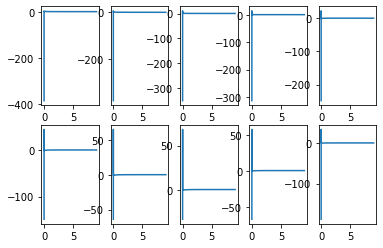

In [13]:
alphas = [a * 10 ** b for a in range(1, 10) for b in range(0, -6, -1)]
alphas.sort(reverse=False)
betas = []

for alpha in alphas:
    model = Model()
    model.fit(X_train, y_train, alpha=alpha)
    betas.append(model.beta)
    
beta = np.array(betas).T

l = alphas
fig, axs = plt.subplots(2,5)
    #fig.tight_layout()
axs[0,0].plot(l, beta[0])
axs[0,1].plot(l, beta[1])
axs[0,2].plot(l, beta[2])
axs[0,3].plot(l, beta[3])
axs[0,4].plot(l, beta[4])
axs[1,0].plot(l, beta[5])
axs[1,1].plot(l, beta[6])
axs[1,2].plot(l, beta[7])
axs[1,3].plot(l, beta[8])
axs[1,4].plot(l, beta[9])
    

in the first 10 dimention, we could know all the beta will go towards to zero.

In [14]:
#beta[0]

In [15]:
model2.beta.shape

(235,)

In [16]:
len(beta)

235

In [17]:
alphas = [0.01, 0.1, 0.5, 1, 5, 10, 100]
# alphas = np.linspace(0.001, 2, num= 1000)
for alpha in alphas:
    model = Model()
    

plot rmse versus lambda

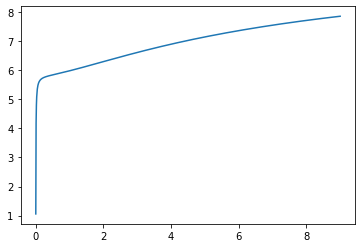

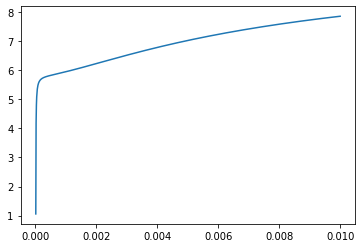

In [18]:
rms = np.zeros(1000)
j=0
for alpha in np.linspace(0.00001,9,num= 1000):
    
    model2 = Model()
    model2.fit(X_val, y_val, alpha)
    y_pred = model2.predict(X_val)
    rms[j] = model2.rmse(X_val, y_val)
    j=j+1
plt.figure(2)
plt.plot(np.linspace(0.00001,9,num = 1000), rms)
plt.figure(4)
plt.plot(np.linspace(0.00001,0.01,num = 1000), rms)

in this figure, we could know that 0.00001 will be the best lamda to achieve minimum RMSE

2. plot predicted versus real value

Text(0, 0.5, 'predicted values of glucose')

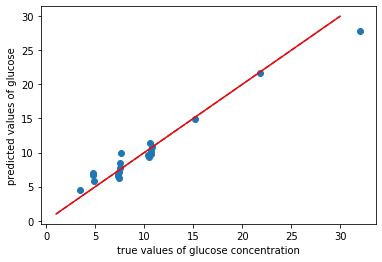

In [19]:
alpha = 0.00001
model2.fit(X_test, y_test, alpha)
xt= model2.predict(X_test)
plt.figure(3)
plt.scatter(y_test,xt)
#plot the y = x 
x = [1, 2, 3, 4, 5, 6, 7,25,30]
y = [1, 2, 3, 4, 5, 6, 7,25,30]
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
plt.plot(x, y, '--')
plt.plot(x, abline_values, 'r')
plt.xlabel("true values of glucose concentration")
plt.ylabel("predicted values of glucose")